# Distribuzione gaussiana della somma delle cifre dei numeri di pagine estratte casualmente da un libro di testo.

In [1]:
import random
import statistics
import matplotlib.pyplot as plt
import numpy as np
import math

Si estraggono numeri casuali del libro, che vengono aggiunti ad una lista che rappresenta i valori che appariranno sulle ascisse, e si calcola la somma delle cifre, che vengono aggiunte ad una lista che rappresenta i valori che appariranno sulle ordinate.

Inserire in input il numero di pagine del libro e il numeoro di estrazioni:

In [2]:
n_pag = int(input())
e = int(input())
xvals = []
yvals = []
sum = 0

for x in range(e):
    p = random.randint(1, n_pag)
    for y in str(p):
        sum = sum + int(y)
    xvals.append(sum)
    yvals.append(x)
    sum = 0

Si rappresentano i valori in un grafico

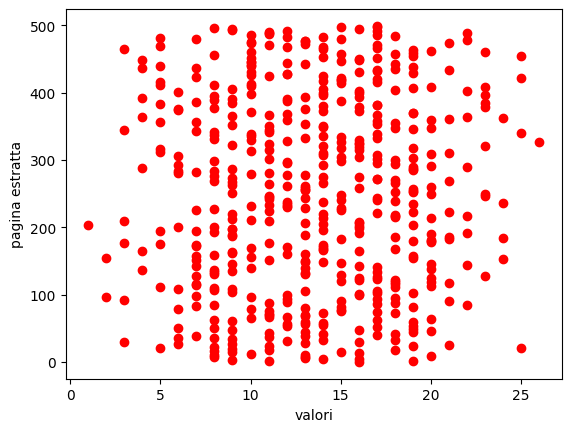

In [3]:
plt.plot(xvals, yvals, 'ro')
plt.xlabel('valori')
plt.ylabel('pagina estratta')
plt.show()

Dal grafico si evince come ci sia una maggiore densità dei valori di mezzo. Quindi rapprento tutti i valori che si otterrebbero per ogni pagina del libro.

In [4]:
results = []  #le somme
ordinate = [] #num di pagina da 1 a mille
bars = [] #quante volte si ripete una stessa somma
somme = [] #somme ottenute
value = 0
count = 0

for i in range(1, n_pag+1):
    ordinate.append(i)
    for j in str(i):
        value = value + int(j)
    results.append(value)
    value = 0

max_value = max(results)
for w in range(max_value+1):
    somme.append(w)
    for z in results:
        if z == w:
            count = count + 1
    bars.append(count)
    count = 0

Si rappresentano i valori in un grafico, il primo lineare e il secondo a barre.

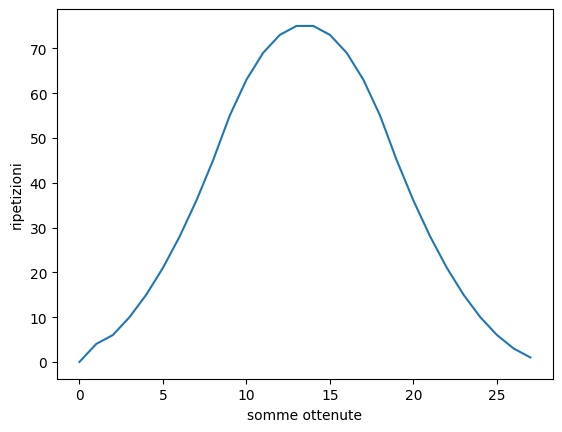

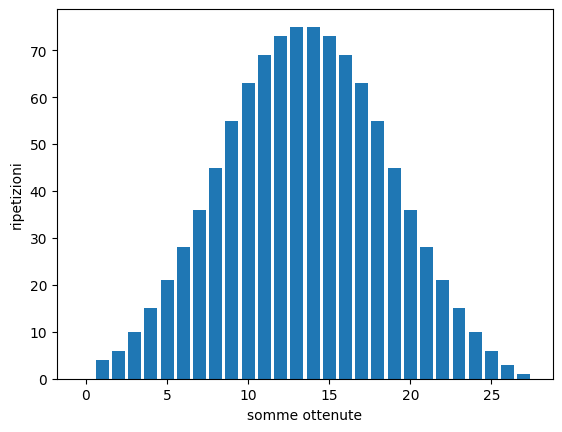

In [5]:
plt.plot(somme, bars, '-')
plt.xlabel('somme ottenute')
plt.ylabel('ripetizioni')
plt.show()

plt.bar(somme, bars)
plt.xlabel('somme ottenute')
plt.ylabel('ripetizioni')
plt.show()

Dal grafico si evince che la distribuzione dei valori è una distribuzione normale, quindi trovo la formula della distribuzione normale che descriva i valori ottenuti.

Perciò bisogna trovare la media e la deviazione standard

In [6]:
media = statistics.mean(bars)
deviazione_standard = statistics.stdev(bars)

print('media: ' + str(media))
print('deviazione standard: ' + str(deviazione_standard))

media: 35.714285714285715
deviazione standard: 26.90429835251739


La formula sarà:
$$
\frac{1}{\sqrt{2πσ^{2}}} e^{-\frac{(x-µ)^{2}}{2σ^{2}}}
$$
dove µ è la media e σ è la deviazione standard.

Quindi si rappresenta la funzione graficamente:

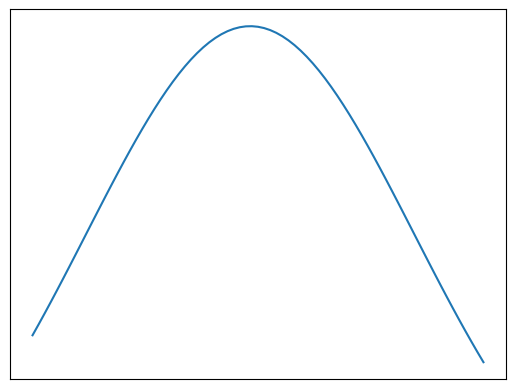

In [7]:

numbers = np.arange(0, max(bars), 1)
plt.plot(numbers, pow(math.e, (-pow((numbers-media), 2) / (2*pow(deviazione_standard, 2))))/(deviazione_standard * math.sqrt(2 * math.pi)), '-')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.show()